In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm 
import matplotlib.colors as colors
from bs4 import BeautifulSoup
import requests
from pandas.io.json import json_normalize
!pip install folium
import folium

     |████████████████████████████████| 94 kB 3.9 MB/s eta 0:00:011


## 1. Download and Explore Dataset

In [2]:
!wget -O geoname.csv "https://raw.githubusercontent.com/HaoZ124/Coursera_Capstone//main/Geoname.csv"

--2021-02-26 02:23:54--  https://raw.githubusercontent.com/HaoZ124/Coursera_Capstone//main/Geoname.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /HaoZ124/Coursera_Capstone/main/Geoname.csv [following]
--2021-02-26 02:23:55--  https://raw.githubusercontent.com/HaoZ124/Coursera_Capstone/main/Geoname.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 16652 (16K) [text/plain]
Saving to: ‘geoname.csv’

geoname.csv         100%[===================>]  16.26K  --.-KB/s    in 0.001s  

2021-02-26 02:23:55 (19.5 MB/s) - ‘geoname.csv’ saved [16652/16652]



In [3]:
df_geo = pd.read_csv('geoname.csv', encoding='windows-1252')
df_geo.head()

,Place,Code,Country,Admin1,Admin2,Admin3
0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,49.323/-122.863,NaN,NaN,NaN,NaN,NaN
2,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,49.221/-122.69,NaN,NaN,NaN,NaN,NaN
4,White Rock,V4B,Canada,British Columbia,NaN,NaN


In [4]:
df1 = df_geo.iloc[1::2,:]
df = df_geo.iloc[0::2,:]
df.reset_index(drop=True, inplace=True)
df1['Latitude'] = df1['Place'].str.split('/', expand=True)[0]
df1['Longitude'] = df1['Place'].str.split('/', expand=True)[1]
df2 = df1.drop(columns = ['Place','Code','Country','Admin1','Admin2','Admin3'])
df2.head(20)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Latitude,Longitude
1,49.323,-122.863
3,49.221,-122.69
5,49.026,-122.806
7,49.481,-119.586
9,49.866,-119.739
11,50.022,-119.405
13,49.683,-115.986
15,48.814,-123.497
17,49.076,-121.988
19,49.042,-122.283


In [5]:
df2['Latitude'] = df2['Latitude'].astype(float)
df2['Longitude'] = df2['Longitude'].astype(float)
df2.reset_index(drop=True, inplace=True)
joint = pd.merge(df, df2, how='left', left_index=True, right_index=True)
joint.head()

,Place,Code,Country,Admin1,Admin2,Admin3,Latitude,Longitude
0,Port Moody,V3H,Canada,British Columbia,NaN,NaN,49.323,-122.863
1,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN,49.221,-122.690
2,White Rock,V4B,Canada,British Columbia,NaN,NaN,49.026,-122.806
3,Penticton,V2A,Canada,British Columbia,NaN,NaN,49.481,-119.586
4,Westbank,V4T,Canada,British Columbia,NaN,NaN,49.866,-119.739


In [6]:
Process = joint[joint.Admin2.str.contains('Vancouver', na=False)]
Process.drop(columns = ['Country','Admin1','Admin3'], inplace=True)
Process.rename(columns = {'Admin2':'City'}, inplace=True)
Process.reset_index(drop=True, inplace=True)
Process.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Place,Code,City,Latitude,Longitude
0,Vancouver (SE Kensington / Victoria-Fraserview),V5P,Vancouver,49.222,-123.068
1,Vancouver (South Renfrew-Collingwood),V5R,Vancouver,49.240,-123.041
2,Vancouver (Killarney),V5S,Vancouver,49.218,-123.038
3,Vancouver (East Mount Pleasant),V5T,Vancouver,49.262,-123.092
4,Vancouver (West Kensington / NE Riley Park-Lit...,V5V,Vancouver,49.248,-123.091


In [7]:
Process.shape

(44, 5)

In [8]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [9]:
map_van = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Process['Latitude'], Process['Longitude'], Process['Place']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_van)  
    
map_van

In [10]:
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' # your Foursquare ID
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ
CLIENT_SECRET:CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM


In [11]:
radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,Indian Roti Kitchen,Indian Restaurant,49.258950,-123.115087
1,Moii Cafe,Café,49.262679,-123.114812
2,La Taqueria Pinche Taco Shop,Taco Place,49.263534,-123.112795
3,Body Energy Club,Food,49.261007,-123.117038
4,Marulilu Cafe,Japanese Restaurant,49.263338,-123.114118


In [14]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

72 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Manhattan

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
van_venues = getNearbyVenues(names=Process['Place'],
                                   latitudes=Process['Latitude'],
                                   longitudes=Process['Longitude']
                                  )

Vancouver (SE Kensington / Victoria-Fraserview)
Vancouver (South Renfrew-Collingwood)
Vancouver (Killarney)
Vancouver (East Mount Pleasant)
Vancouver (West Kensington / NE Riley Park-Little Mountain)
Vancouver (SE Riley Park-Little Mountain / SW Kensington / NE Oakridge / North Sunset)
Vancouver (SE Oakridge / East Marpole / South Sunset)
Vancouver (West Mount Pleasant / West Riley Park-Little Mountain)
Vancouver (East Fairview / South Cambie)
Vancouver (Waterfront / Coal Harbour / Canada Place)
Vancouver (South West End)
Vancouver (North West End / Stanley Park)
Vancouver (West Fairview / Granville Island / NE Shaughnessy)
Vancouver (NW Shaughnessy / East Kitsilano / Quilchena)
Vancouver (Central Kitsilano)
Vancouver (NW Arbutus Ridge)
Vancouver (South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge)
Vancouver (Dunbar-Southlands / Musqueam)
Vancouver (SE Kerrisdale / SW Oakridge / West Marpole)
Vancouver (West Kitsilano / Jericho)
Vancouver (Chaldecutt / South University 

In [17]:
van_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
North Vancouver East Central,1,1,1,1,1,1
North Vancouver North Central,3,3,3,3,3,3
North Vancouver Northwest,19,19,19,19,19,19
North Vancouver Northwest Central,3,3,3,3,3,3
North Vancouver South Central,4,4,4,4,4,4
North Vancouver Southwest,11,11,11,11,11,11
North Vancouver Southwest Central,2,2,2,2,2,2
Vancouver (Bentall Centre),7,7,7,7,7,7
Vancouver (Central Kitsilano),33,33,33,33,33,33


## 3. Analyze Each Neighborhood

In [18]:
# one hot encoding
van_onehot = pd.get_dummies(van_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
van_onehot['Neighborhood'] = van_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [van_onehot.columns[-1]] + list(van_onehot.columns[:-1])
van_onehot = van_onehot[fixed_columns]

van_onehot.head()

,Neighborhood,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,...,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,Vancouver (SE Kensington / Victoria-Fraserview),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vancouver (SE Kensington / Victoria-Fraserview),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vancouver (SE Kensington / Victoria-Fraserview),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vancouver (SE Kensington / Victoria-Fraserview),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vancouver (SE Kensington / Victoria-Fraserview),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
van_onehot.shape

(810, 187)

In [20]:
van_grouped = van_onehot.groupby('Neighborhood').mean().reset_index()
van_grouped

,Neighborhood,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,...,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Women's Store,Yoga Studio
0,North Vancouver East Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,North Vancouver North Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,North Vancouver Northwest,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,North Vancouver Northwest Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,North Vancouver South Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,North Vancouver Southwest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,North Vancouver Southwest Central,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Vancouver (Bentall Centre),0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,Vancouver (Central Kitsilano),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,...,0.030303,0.000000,0.000000,0.000000,0.060606,0.030303,0.000000,0.030303,0.00,0.030303
9,Vancouver (Chaldecutt / South University Endow...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [21]:
num_top_venues = 5

for hood in van_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = van_grouped[van_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----North Vancouver East Central----
                venue  freq
0  Rock Climbing Spot   1.0
1    Airport Terminal   0.0
2        Optical Shop   0.0
3            Mountain   0.0
4       Movie Theater   0.0


----North Vancouver North Central----
             venue  freq
0   Scenic Lookout  0.33
1         Mountain  0.33
2            Trail  0.33
3           Office  0.00
4  Motorcycle Shop  0.00


----North Vancouver Northwest----
                 venue  freq
0                Trail  0.26
1           Restaurant  0.11
2           Ski Chalet  0.11
3  Sporting Goods Shop  0.05
4            Ski Trail  0.05


----North Vancouver Northwest Central----
                           venue  freq
0                          Trail  0.67
1  Paper / Office Supplies Store  0.33
2               Airport Terminal  0.00
3                         Office  0.00
4                Motorcycle Shop  0.00


----North Vancouver South Central----
                 venue  freq
0              Butcher  0.25
1       Breakfast S

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = van_grouped['Neighborhood']

for ind in np.arange(van_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(van_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Vancouver East Central,Rock Climbing Spot,Yoga Studio,Electronics Store,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Fair
1,North Vancouver North Central,Mountain,Trail,Scenic Lookout,Yoga Studio,Ethiopian Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
2,North Vancouver Northwest,Trail,Ski Chalet,Restaurant,Ski Trail,Ski Chairlift,Skating Rink,Sporting Goods Shop,Scenic Lookout,Mountain,Fast Food Restaurant
3,North Vancouver Northwest Central,Trail,Paper / Office Supplies Store,Yoga Studio,Ethiopian Restaurant,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
4,North Vancouver South Central,Sandwich Place,Breakfast Spot,Butcher,Japanese Restaurant,Yoga Studio,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market


## 4. Cluster Neighborhoods

In [24]:
# set number of clusters
kclusters = 10

van_grouped_clustering = van_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(van_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 9, 9, 9, 1, 1, 6, 1, 1, 4], dtype=int32)

In [25]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

van_merged = Process

# merge van_grouped with van_data to add latitude/longitude for each neighborhood
van_merged.rename(columns={'Place':'Neighborhood'}, inplace=True)

van_merged = van_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

van_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Code,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vancouver (SE Kensington / Victoria-Fraserview),V5P,Vancouver,49.222,-123.068,1.0,Pizza Place,Bus Stop,Restaurant,Post Office,Sushi Restaurant,Fried Chicken Joint,Sandwich Place,Middle Eastern Restaurant,Gas Station,Indian Restaurant
1,Vancouver (South Renfrew-Collingwood),V5R,Vancouver,49.240,-123.041,1.0,Hotel,Asian Restaurant,Bus Stop,Park,Bar,Fish & Chips Shop,Dim Sum Restaurant,Financial or Legal Service,Filipino Restaurant,Department Store
2,Vancouver (Killarney),V5S,Vancouver,49.218,-123.038,1.0,Bus Stop,Chinese Restaurant,Bank,Farmers Market,Shopping Mall,Sandwich Place,Salon / Barbershop,Liquor Store,Sushi Restaurant,Gas Station
3,Vancouver (East Mount Pleasant),V5T,Vancouver,49.262,-123.092,1.0,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Hotel,Outdoor Sculpture,Pharmacy,Pizza Place,Cocktail Bar,Music Venue,Pub
4,Vancouver (West Kensington / NE Riley Park-Lit...,V5V,Vancouver,49.248,-123.091,1.0,Coffee Shop,Chinese Restaurant,Bus Stop,Filipino Restaurant,Vietnamese Restaurant,Greek Restaurant,Café,Breakfast Spot,Sandwich Place,Liquor Store


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
van_merged.dropna(inplace=True)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(van_merged['Latitude'], van_merged['Longitude'], van_merged['Neighborhood'], van_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

#### Cluster 2

In [90]:
van_merged.loc[van_merged['Cluster Labels'] == 1, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5P,1.0,Pizza Place,Bus Stop,Restaurant,Post Office,Sushi Restaurant,Fried Chicken Joint,Sandwich Place,Middle Eastern Restaurant,Gas Station,Indian Restaurant
1,V5R,1.0,Hotel,Asian Restaurant,Bus Stop,Park,Bar,Fish & Chips Shop,Dim Sum Restaurant,Financial or Legal Service,Filipino Restaurant,Department Store
2,V5S,1.0,Bus Stop,Chinese Restaurant,Bank,Farmers Market,Shopping Mall,Sandwich Place,Salon / Barbershop,Liquor Store,Sushi Restaurant,Gas Station
3,V5T,1.0,Sushi Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Hotel,Outdoor Sculpture,Pharmacy,Pizza Place,Cocktail Bar,Music Venue,Pub
4,V5V,1.0,Coffee Shop,Chinese Restaurant,Bus Stop,Filipino Restaurant,Vietnamese Restaurant,Greek Restaurant,Café,Breakfast Spot,Sandwich Place,Liquor Store
5,V5W,1.0,Chinese Restaurant,Pizza Place,Coffee Shop,Field,Fast Food Restaurant,Fried Chicken Joint,Tea Room,Dog Run,Bakery,Grocery Store
9,V6C,1.0,Hotel,Boat or Ferry,Café,Restaurant,Coffee Shop,Hotel Bar,Vegetarian / Vegan Restaurant,Japanese Restaurant,Salon / Barbershop,Spa
10,V6E,1.0,Japanese Restaurant,Bakery,Hotel,Coffee Shop,Dessert Shop,Gay Bar,Sushi Restaurant,Restaurant,Mexican Restaurant,Italian Restaurant
12,V6H,1.0,Physical Therapist,Historic Site,Pet Store,Bus Stop,Breakfast Spot,Japanese Restaurant,Bakery,Event Space,Filipino Restaurant,Field
13,V6J,1.0,Electronics Store,Pharmacy,Bar,Breakfast Spot,Furniture / Home Store,Sushi Restaurant,Restaurant,Thai Restaurant,Japanese Restaurant,Tennis Court


#### Cluster 3

In [84]:
van_merged.loc[van_merged['Cluster Labels'] == 2, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,V5X,2.0,Indian Restaurant,Park,Restaurant,Yoga Studio,Ethiopian Restaurant,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm


#### Cluster 6

In [86]:
van_merged.loc[van_merged['Cluster Labels'] == 5, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,V7W,5.0,Trail,Tapas Restaurant,Yoga Studio,Ethiopian Restaurant,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm


#### Cluster 9

In [87]:
van_merged.loc[van_merged['Cluster Labels'] == 8, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,V7V,8.0,Art Gallery,Yoga Studio,Event Space,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm


#### Cluster 10

In [82]:
van_merged.loc[van_merged['Cluster Labels'] == 9, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,V6G,9.0,Trail,Park,Outdoor Sculpture,Garden,Yoga Studio,Ethiopian Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
25,V7K,9.0,Mountain,Trail,Scenic Lookout,Yoga Studio,Ethiopian Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
28,V7N,9.0,Trail,Paper / Office Supplies Store,Yoga Studio,Ethiopian Restaurant,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
30,V7R,9.0,Trail,Ski Chalet,Restaurant,Ski Trail,Ski Chairlift,Skating Rink,Sporting Goods Shop,Scenic Lookout,Mountain,Fast Food Restaurant


## 6. Import Commercial Property Lease Data

In [32]:
!wget -O Rental.csv 'https://raw.githubusercontent.com/HaoZ124/Coursera_Capstone/main/Lease%20Price.csv'

--2021-02-26 02:24:16--  https://raw.githubusercontent.com/HaoZ124/Coursera_Capstone/main/Lease%20Price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219 [text/plain]
Saving to: ‘Rental.csv’

Rental.csv          100%[===================>]     219  --.-KB/s    in 0s      

2021-02-26 02:24:16 (4.02 MB/s) - ‘Rental.csv’ saved [219/219]



In [33]:
df_rent = pd.read_csv('Rental.csv')
df_rent.head()

,Postal Code,Lease Fee
0,V6A,19.75
1,V6A,28.68
2,V5M,69.91
3,V6B,54.75
4,V5T,57.66


In [63]:
df = df_rent.groupby('Postal Code').mean().round(decimals=2)
df.reset_index(inplace=True)
df.head()

,Postal Code,Lease Fee
0,V5L,43.52
1,V5M,69.91
2,V5T,57.66
3,V5X,58.72
4,V6A,37.22


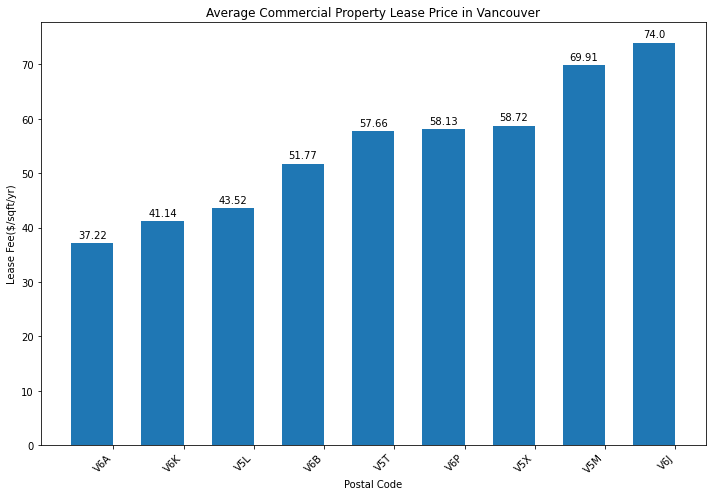

In [66]:
x = np.arange(len(df['Postal Code']))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
Lease = ax.bar(x - width/2, df['Lease Fee'], width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lease Fee($/sqft/yr)')
ax.set_xlabel('Postal Code')
ax.set_title('Average Commercial Property Lease Price in Vancouver')
ax.set_xticks(x)
ax.set_xticklabels(df['Postal Code'], rotation=45, ha='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(Lease)

fig.tight_layout()

plt.show()

In [65]:
df.sort_values(by='Lease Fee', ascending=True, inplace=True)
df

,Postal Code,Lease Fee
4,V6A,37.22
7,V6K,41.14
0,V5L,43.52
5,V6B,51.77
2,V5T,57.66
8,V6P,58.13
3,V5X,58.72
1,V5M,69.91
6,V6J,74.00


## 7. Make Comparison Between Clusters And Cost

In [88]:
van_merged.loc[van_merged['Code'] == 'V6A', van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,V6A,1.0,Park,Food Truck,Deli / Bodega,Pie Shop,Pub,Restaurant,Cheese Shop,Sandwich Place,Seafood Restaurant,Café


In [89]:
van_merged.loc[van_merged['Code'] == 'V6K', van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,V6K,1.0,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Pub,Burger Joint,Food Truck,Spa,Southern / Soul Food Restaurant,Breakfast Spot


In [91]:
Process.loc[Process['Code'] == 'V6K']

,Neighborhood,Code,City,Latitude,Longitude
14,Vancouver (Central Kitsilano),V6K,Vancouver,49.265,-123.165
